# 📕 Spread Locator - Statistical Distribution Analysis


# ✅ PART A - Theoretical Foundation 

## 1 what is statistical Distribution ?

A statistical distribution shows how values are apread in a dataset.
Example : how transaction amounts vary across customers.

## 2. What is a Q-Q Plot?
Q-Q plot compares your data with a normal distribution.
if points lie on a straight line -> data is normal.

## 3. Discrete vs Countinuous Distribution
- Discrete : count values (transactions per day)
- Continuous : measured values (transaction amount)

## 4. Bernoulli Distribution
only two outcomes (success / fail).
example: Transaction success = 1, failure = 0.

## 5. Binomial Distribution
Multiple bernoulli  trials.
Example: number of successful transaction in a week.

## 6. Log-Normal distribution
Used when data is **positively skewed** (transaction amounts)

## 7. Power Law Distribution
Few very large values + many small values.
seen in e-commerce spending.

## 8.Box-cox Transform
Used to reduce skewness and stabilize variance.

## 9.Poisson Distribution
Used for counting events per time.
Example: transactions per day.

## 10. Z-scors Probability
measures how far a value is from mean;
z = (x - μ) / σ

## 11. PDF vs CDF
- PDF: probability density
- CDF: cumulation probability




# ✅ PART B - Practical python analysis
 

- step 1: Load dataset



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import bernoulli, binom, poisson, lognorm, powerlaw, probplot
from scipy.stats import boxcox, norm

In [9]:
data = pd.read_csv('spread_locator_dataset.csv')

print(data.head())
print(data.info())
print(data.describe())  

                         transaction_id customer_id  ...  region transaction_status
0  e98aa092-3770-4fdb-9502-5b5a6a244811    CUST2824  ...   North               Fail
1  11ba6918-dba0-41e5-96cf-f5a7b95f0103    CUST1409  ...    East               Fail
2  82b7654b-6eb7-4579-89a0-1a9edec0a7bb    CUST5506  ...   South               Fail
3  f7166574-f400-4d53-b526-0b11f6619ddf    CUST5012  ...   South            Success
4  8632fe26-b507-4068-9c68-1b2fa04fecb3    CUST4657  ...   North            Success

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      220 non-null    object 
 1   customer_id         220 non-null    object 
 2   transaction_amount  220 non-null    float64
 3   transaction_date    220 non-null    object 
 4   transaction_count   220 non-null    int64  
 5   region              22

## 🟢 1. Bernoulli Distribution (Transaction Success)

In [16]:
data["success_binary"] = data["transaction_status"].map({"Success":1,"Fail":0})

p_value = data["success_binary"].mean()

success = round(p_value,3)
print(f"Estimated p-value {p_value:.4f} (probability of success): {success:.2%} ")

Estimated p-value 0.4455 (probability of success): 44.50% 


## 🟢 2. Binomial Distribution (Weekly Transactions)

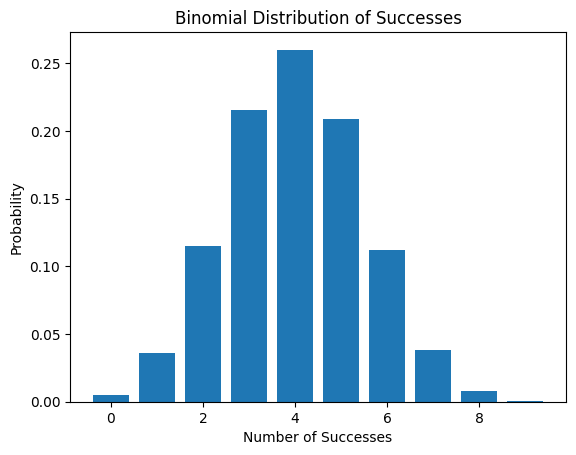

In [17]:
n = data["transaction_count"].max()
p = data["success_binary"].mean()

x = np.arange(0, n+1)
plt.bar(x, binom.pmf(x, n, p))
plt.xlabel('Number of Successes')
plt.ylabel('Probability')   
plt.title('Binomial Distribution of Successes')
plt.show()

## 🟢 3. Poisson Distribution (Transactions per Day)

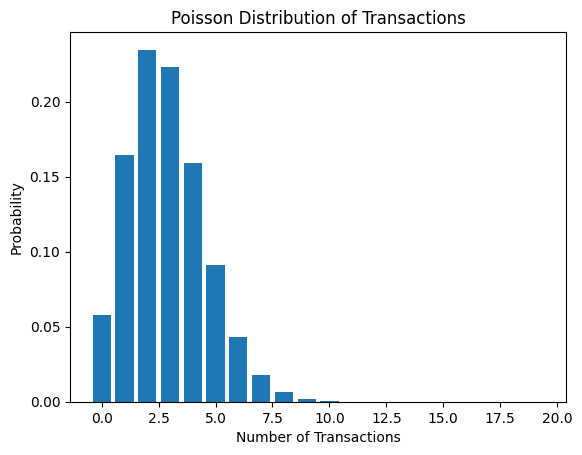

In [18]:
lam = data["transaction_count"].mean()
x = np.arange(0, 20)

plt.bar(x, poisson.pmf(x, lam))
plt.xlabel('Number of Transactions')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Transactions')
plt.show()

## 🟢 4. Log-Normal + Power Law (Transaction Amount)

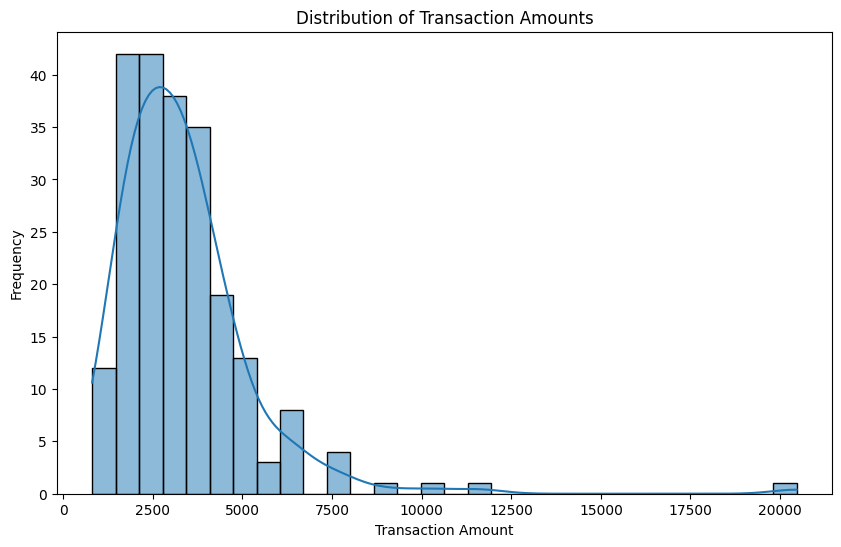

In [19]:
amount = data["transaction_amount"]

plt.figure(figsize=(10, 6))
sns.histplot(amount, bins=30, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

## 🟢 5. Q–Q Plot (Normality Check)

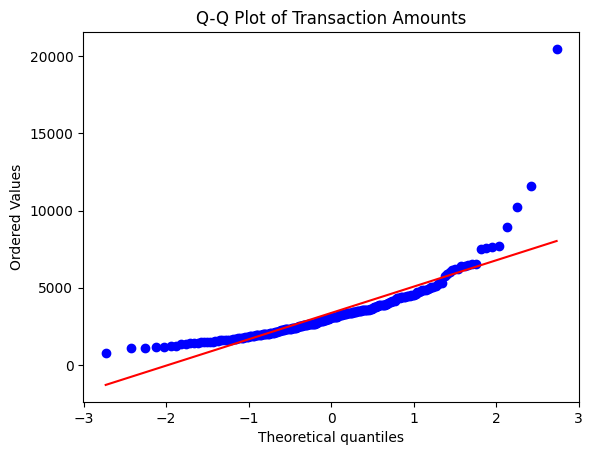

In [20]:
probplot(amount, plot=plt)
plt.title('Q-Q Plot of Transaction Amounts')
plt.show()

## 🟢 6. Box-Cox Transform

Lambda: 2.855


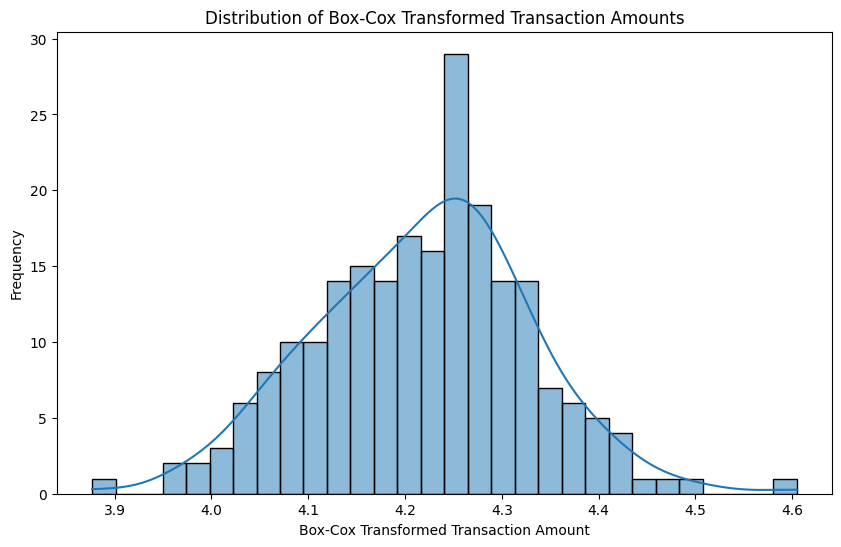

In [21]:
positive_amounts = amount + 1
boxcox_amount, fitted_lambda = boxcox(positive_amounts)

print("Lambda:", round(lam,3))

plt.figure(figsize=(10, 6))
sns.histplot(boxcox_amount, bins=30, kde=True)
plt.xlabel('Box-Cox Transformed Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Box-Cox Transformed Transaction Amounts')
plt.show()

## 🟢 7. Z-Score + Probability Above ₹5000

In [22]:
mean = amount.mean()
std = amount.std()
z = (5000 - mean) / std
print(f"Z-score for $5000: {z:.2f}")

prob = 1 - norm.cdf(z)
print(f"Probability of a transaction amount exceeding $5000: {prob:.4f} ({prob:.2%})")

print("Z Score:", round(z,3))
print("Probability Amount > 5000:", round(prob,4))

Z-score for $5000: 0.82
Probability of a transaction amount exceeding $5000: 0.2052 (20.52%)
Z Score: 0.823
Probability Amount > 5000: 0.2052


## 🟢 8. PDF and CDF Plot

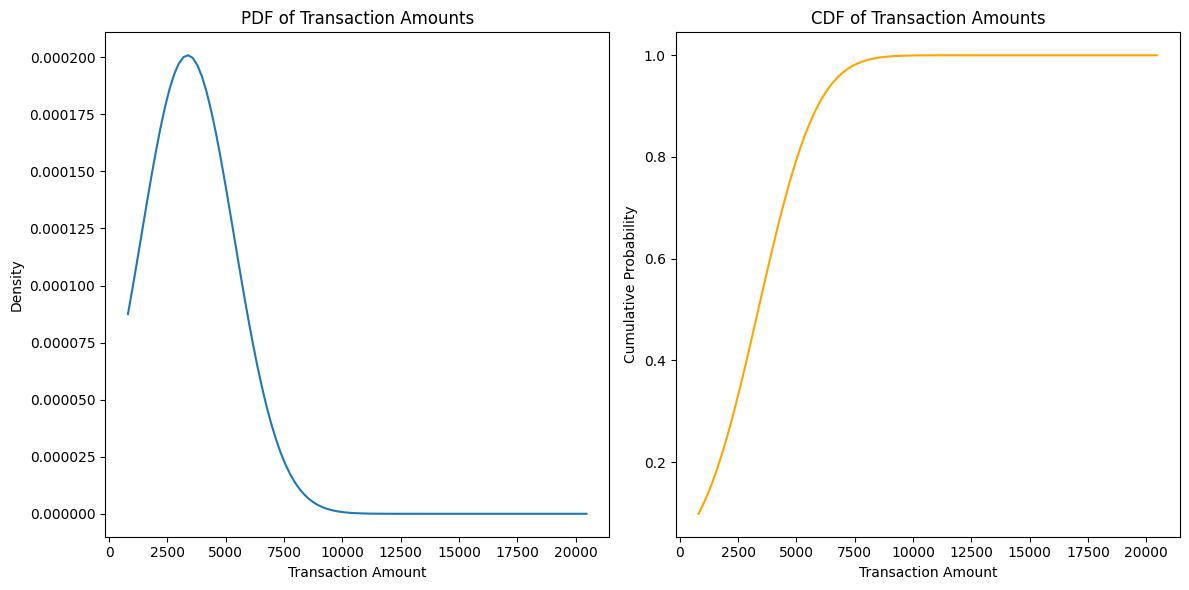

In [23]:
x = np.linspace(amount.min(), amount.max(), 100)
pdf = norm.pdf(x, mean, std)
cdf = norm.cdf(x, mean, std)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('PDF of Transaction Amounts')
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF', color='orange')
plt.xlabel('Transaction Amount')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Transaction Amounts')
plt.tight_layout()
plt.show()

# 🎯 FINAL CONCLUSION (Write this)

- Transaction data is highly right-skewed.
- Log-Normal distribution fits better than Normal.

- Box-Cox reduced skewness.

- Poisson fits transaction counts.

- High-value transactions are rare but important.

- Z-score shows probability of amount exceeding ₹5000.

- These insights help business understand spending behavior.

I analyzed transaction data using Bernoulli, Binomial, Poisson, Log-Normal and Power Law distributions.
Q-Q plot checked normality.
Box-Cox stabilized variance.
Z-scores calculated probability above ₹5000.
PDF & CDF visualized distribution.
Conclusion: Transaction amount follows Log-Normal.